
[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


✅ Data Berhasil Diload!
Total Data: 100
                                                text  label Sentiment_Label
0                      Selamat menikmati kemacetan 🤗      0         Negatif
1       Pasti aku besok malam tahun baru hujan nih 😂      0         Negatif
2  Tidak usah merayakan tahun baru tapi rayakanla...      0         Negatif
3                       2026 persib juara deui💙 amin      1         Positif
4                                                 👍🏻      1         Positif

📊 Menampilkan Grafik Distribusi Sentimen...


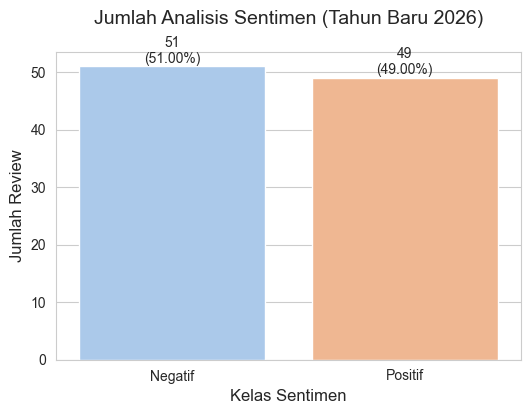


⏳ Sedang melakukan Preprocessing (Cleaning, Stopword, Stemming)...
✅ Preprocessing Selesai!

📊 Menampilkan Grafik Split Data...


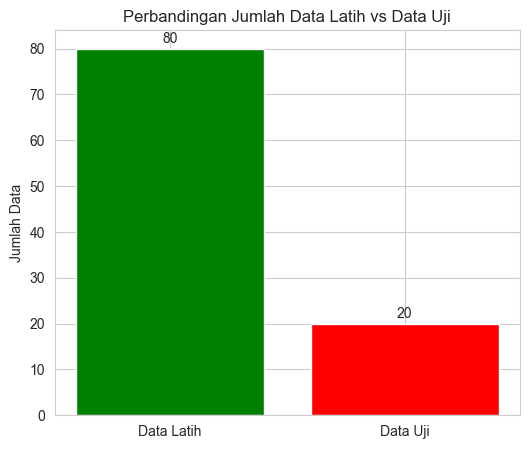


Jumlah Data Latih: 80
Jumlah Data Uji: 20

--- Training SVM dengan Kernel: LINEAR ---
Akurasi LINEAR: 80.00%
              precision    recall  f1-score   support

     Negatif       0.73      0.89      0.80         9
     Positif       0.89      0.73      0.80        11

    accuracy                           0.80        20
   macro avg       0.81      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20


--- Training SVM dengan Kernel: RBF ---
Akurasi RBF: 80.00%
              precision    recall  f1-score   support

     Negatif       0.69      1.00      0.82         9
     Positif       1.00      0.64      0.78        11

    accuracy                           0.80        20
   macro avg       0.85      0.82      0.80        20
weighted avg       0.86      0.80      0.80        20



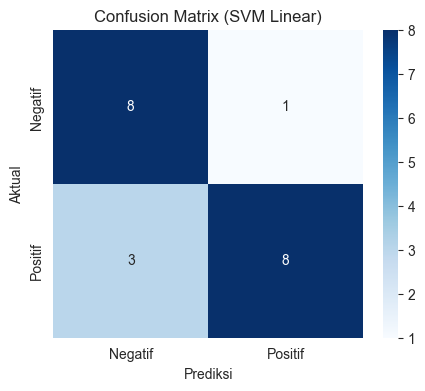


🎨 Membuat Visualisasi WordCloud...


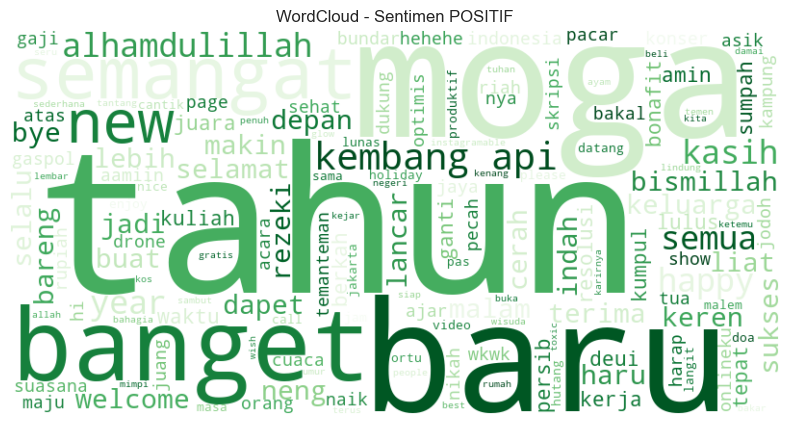

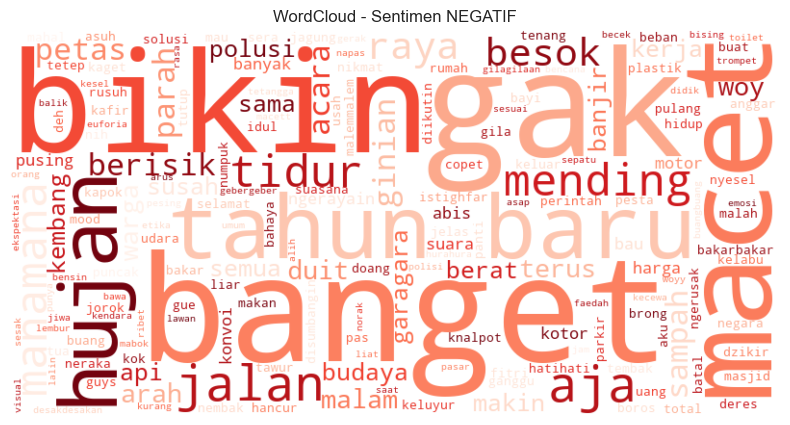

In [1]:
# ==============================================================================
# 1. IMPORT LIBRARY
# ==============================================================================
!pip install Sastrawi wordcloud scikit-learn matplotlib seaborn pandas --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from wordcloud import WordCloud

# ==============================================================================
# 2. LOAD DATASET
# ==============================================================================
filename = 'dataset_tahun_baru_2026.csv'
df = pd.read_csv(filename)

# Mapping Label (0=Negatif, 1=Positif)
df['Sentiment_Label'] = df['label'].map({0: 'Negatif', 1: 'Positif'})

print("✅ Data Berhasil Diload!")
print(f"Total Data: {len(df)}")
print(df.head())

# ==============================================================================
# 3. VISUALISASI DATA AWAL (GRAFIK 1: DISTRIBUSI SENTIMEN) -- [DITAMBAHKAN KEMBALI]
# ==============================================================================
print("\n📊 Menampilkan Grafik Distribusi Sentimen...")
sentiment_count = df['Sentiment_Label'].value_counts()

plt.figure(figsize=(6, 4))
sns.set_style('whitegrid')
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel', hue=sentiment_count.index, legend=False)

plt.title('Jumlah Analisis Sentimen (Tahun Baru 2026)', fontsize=14, pad=20)
plt.xlabel('Kelas Sentimen', fontsize=12)
plt.ylabel('Jumlah Review', fontsize=12)

# Menambahkan angka di atas batang
total = len(df)
for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

# ==============================================================================
# 4. PREPROCESSING LENGKAP (SESUAI MODUL HAL 24)
# ==============================================================================
stemmer = StemmerFactory().create_stemmer()
stopword_remover = StopWordRemoverFactory().create_stop_word_remover()

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = stopword_remover.remove(text)
    text = stemmer.stem(text)
    return text

print("\n⏳ Sedang melakukan Preprocessing (Cleaning, Stopword, Stemming)...")
df['clean_text'] = df['text'].apply(preprocess_text)
print("✅ Preprocessing Selesai!")

# ==============================================================================
# 5. SPLIT DATA & TF-IDF (SESUAI MODUL HAL 25)
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['label'], test_size=0.2, random_state=42)

# --- VISUALISASI SPLIT DATA (GRAFIK 2: LATIH VS UJI) -- [DITAMBAHKAN KEMBALI] ---
print("\n📊 Menampilkan Grafik Split Data...")
plt.figure(figsize=(6, 5))
bars = plt.bar(['Data Latih', 'Data Uji'], [len(X_train), len(X_test)], color=['green', 'red'])

# Menambahkan label angka
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height}', ha='center', va='bottom')

plt.title('Perbandingan Jumlah Data Latih vs Data Uji')
plt.ylabel('Jumlah Data')
plt.show()
# --------------------------------------------------------------------------------

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train.fillna(''))
X_test_vec = vectorizer.transform(X_test.fillna(''))

print(f"\nJumlah Data Latih: {X_train.shape[0]}")
print(f"Jumlah Data Uji: {X_test.shape[0]}")

# ==============================================================================
# 6. TRAINING & BANDINGKAN KERNEL (SESUAI MODUL POIN C.3)
# ==============================================================================
def train_evaluate_svm(kernel_type):
    print(f"\n--- Training SVM dengan Kernel: {kernel_type.upper()} ---")
    model = SVC(kernel=kernel_type, C=1.0)
    model.fit(X_train_vec, y_train)
    
    y_pred = model.predict(X_test_vec)
    acc = accuracy_score(y_test, y_pred)
    
    print(f"Akurasi {kernel_type.upper()}: {acc*100:.2f}%")
    print(classification_report(y_test, y_pred, target_names=['Negatif', 'Positif']))
    return y_pred, acc

# Bandingkan Linear vs RBF
y_pred_linear, acc_linear = train_evaluate_svm('linear')
y_pred_rbf, acc_rbf = train_evaluate_svm('rbf')

# ==============================================================================
# 7. VISUALISASI CONFUSION MATRIX
# ==============================================================================
cm = confusion_matrix(y_test, y_pred_linear)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.title('Confusion Matrix (SVM Linear)')
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

# ==============================================================================
# 8. VISUALISASI WORDCLOUD
# ==============================================================================
print("\n🎨 Membuat Visualisasi WordCloud...")
text_pos = ' '.join(df[df['label']==1]['clean_text'])
text_neg = ' '.join(df[df['label']==0]['clean_text'])

def plot_wordcloud(text, title, color):
    wc = WordCloud(width=800, height=400, background_color='white', colormap=color).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

plot_wordcloud(text_pos, "WordCloud - Sentimen POSITIF", "Greens")
plot_wordcloud(text_neg, "WordCloud - Sentimen NEGATIF", "Reds")